# Comparison with existing python libraries
## using package pca

#### Data import used from dataimport.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

get the data from data.csv

save it in dataframe to add the labels + save a copy in dataframe1 to have the data without the added labels

In [3]:
from dataimport import get_df_merged_with_labels
dataframe =  get_df_merged_with_labels()
print(dataframe.head(10))

  Class  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0  PRAD     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1  LUAD     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2  PRAD     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3  PRAD     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4  BRCA     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
5  PRAD     0.0  3.467853  3.581918  6.620243   9.706829     0.0  7.758510   
6  KIRC     0.0  1.224966  1.691177  6.572007   9.640511     0.0  6.754888   
7  PRAD     0.0  2.854853  1.750478  7.226720   9.758691     0.0  5.952103   
8  BRCA     0.0  3.992125  2.772730  6.546692  10.488252     0.0  7.690222   
9  PRAD     0.0  3.642494  4.423558  6.849511   9.464466     0.0  7.947216   

     gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0  ...    4.926711    8.210257    9.723516    7

get a copy of dataframe without the labels

In [4]:
# Drop column 'Unnamed'
if 'Class' in dataframe.columns:
    df1 = dataframe.drop(['Class'], axis=1)

print(df1.head(10))

   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
5     0.0  3.467853  3.581918  6.620243   9.706829     0.0  7.758510   
6     0.0  1.224966  1.691177  6.572007   9.640511     0.0  6.754888   
7     0.0  2.854853  1.750478  7.226720   9.758691     0.0  5.952103   
8     0.0  3.992125  2.772730  6.546692  10.488252     0.0  7.690222   
9     0.0  3.642494  4.423558  6.849511   9.464466     0.0  7.947216   

     gene_7  gene_8    gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0  0.000000  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0  0.000000  ...    4.593372    7.323865 

In [5]:
# Move column 'Class' at the first position
cols = dataframe.columns.tolist()
if cols[-1] == 'Class':
    cols = cols[-1:] + cols[:-1]
    dataframe = dataframe[cols]
dataframe.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


## PCA implementation

using data in df

#### package pca

In [11]:
from pca import pca

In [12]:
# Initialize pca with default parameters
model = pca(normalize=True)

In [6]:
# Load dataset df
X = df1
col_labels = dataframe.Class

look at ellbow plot of explained variance

In [14]:
# Fit transform
results = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [20531] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [530] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [20531] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[530]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 530 Principal Components explain [95.03%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

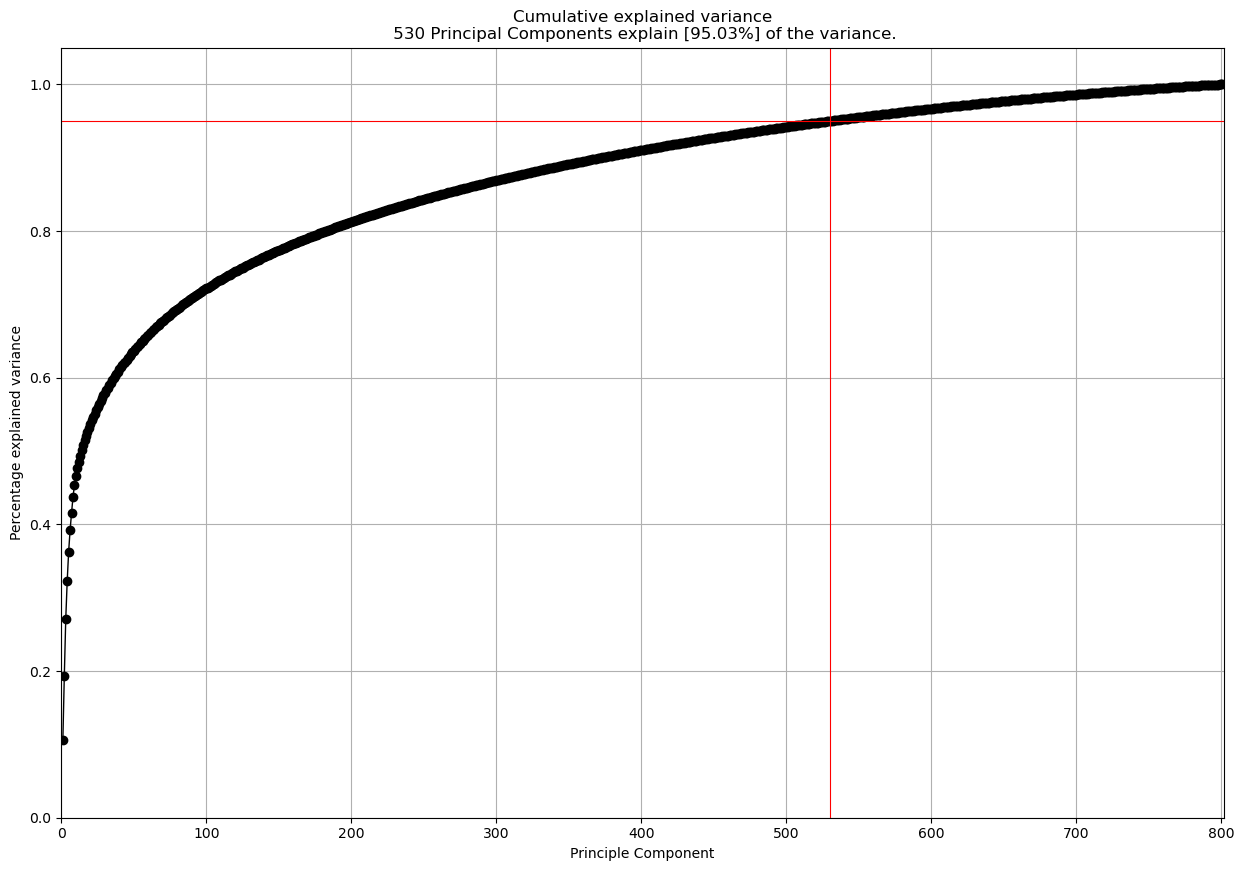

In [15]:
# Plot the explained variance
model.plot()

plot first two PCs

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '530 Principal Components explain [95.03%] of the variance'}, xlabel='PC1 (10.5% expl.var)', ylabel='PC2 (8.75% expl.var)'>)

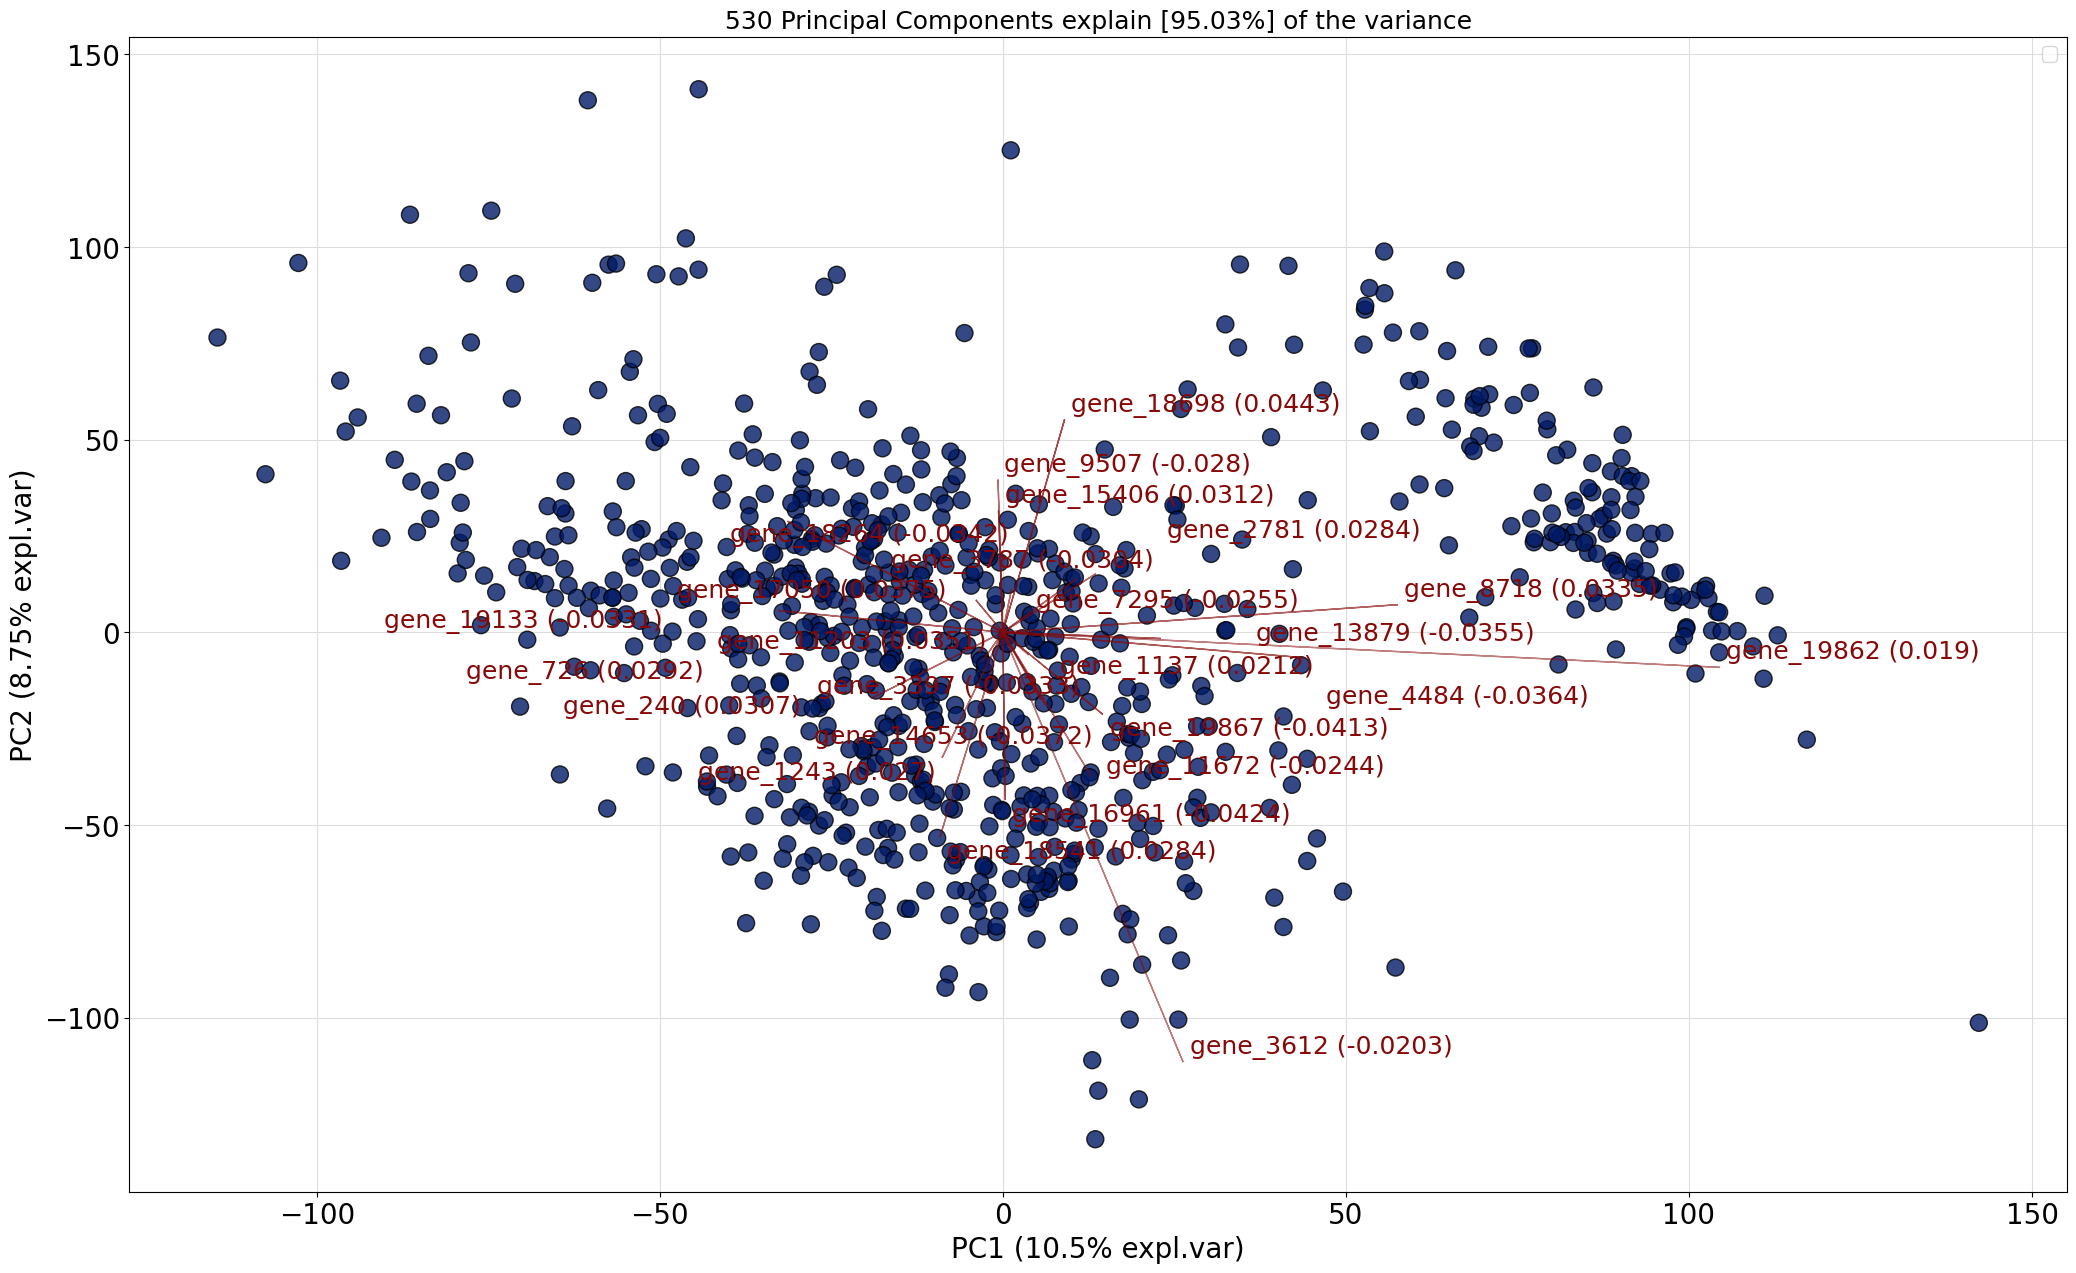

In [16]:
# Scatter plot with loadings
model.biplot()

### PCA implementation with sklearn

In [17]:
from sklearn.decomposition import PCA

In [18]:
dataframe.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


calculate the number of missing values (NaN values) in each column of a DataFrame

In [19]:
dataframe.isnull().sum()

Class         0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

just data for pca

In [20]:
print(df1.values.shape)
df1.head()

(801, 20531)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
pca_data = df1.values
pca_data

array([[ 0.        ,  2.01720929,  3.26552691, ...,  8.92132623,
         5.28675919,  0.        ],
       [ 0.        ,  0.59273209,  1.58842082, ...,  9.39785429,
         2.09416849,  0.        ],
       [ 0.        ,  3.51175898,  4.32719872, ..., 10.09046974,
         1.68302267,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Scaling data with scaler method

In [10]:
scaler = StandardScaler()
data_Scaled = scaler.fit_transform(pca_data)
data_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

PCA with n_components=2

In [24]:
# define number of components as 2 
pca_2_components=PCA(n_components=2)

In [25]:
#Perform fit transform on the scaled data
data_pca_2_components = pca_2_components.fit_transform(data_Scaled)
data_pca_2_components.shape

(801, 2)

In [26]:
data_pca_2_components

array([[-57.44698693,  95.41098068],
       [-16.91943015,   0.73247099],
       [-70.34521786, -19.30332673],
       ...,
       [ -4.13308902,  15.69001064],
       [-30.81475746,  33.52642251],
       [-22.34455671,   4.05235644]])

In [27]:
eigenvectors_sklearn = pca_2_components.components_
eigenvectors_sklearn

array([[ 0.00097941, -0.00235639, -0.00496579, ...,  0.00233708,
         0.00195967,  0.00104891],
       [ 0.00230787, -0.00637287,  0.00046648, ..., -0.01493974,
        -0.00232062,  0.00100493]])

In [28]:
# Put the data back on the 2 columns defined 
pca_data_2comp = pd.DataFrame(data_pca_2_components)
pca_data_2comp.columns = ['pca1','pca2']

# Add the convereted categorical data for 
pca_data_2comp['cancer_type']=dataframe['Class']
pca_data_2comp

,pca1,pca2,cancer_type
0,-57.446987,95.410981,PRAD
1,-16.919430,0.732471,LUAD
2,-70.345218,-19.303327,PRAD
3,-49.161591,-9.227586,PRAD
4,-18.132534,-51.327796,BRCA
...,...,...,...
796,-12.417385,-42.321574,BRCA
797,-29.415554,28.526279,LUAD
798,-4.133089,15.690011,COAD
799,-30.814757,33.526423,PRAD


In [29]:
import seaborn as sns

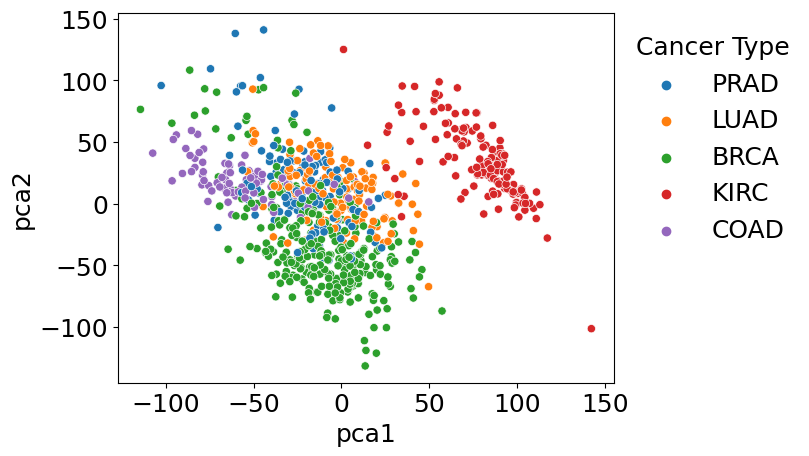

In [30]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=pca_data_2comp)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [31]:
# Compute the explained variance ratio
explained_variance_ratio = pca_2_components.explained_variance_ratio_
explained_variance_ratio
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio)
var_sum

0.192940138199242

In [32]:
# show how much variance each component explains
explained_variance_ratio

array([0.10539781, 0.08754232])

In [33]:
print(pca_2_components.singular_values_)

[1307.96055583 1192.03191725]


pca 2 components on unscaled data -> the data is centered with the method fit_transform()

In [34]:
#Perform fit transform on the scaled data
data_pca_2_comp_unscaled = pca_2_components.fit_transform(pca_data)
data_pca_2_comp_unscaled.shape

(801, 2)

In [35]:
data_pca_2_comp_unscaled

array([[-62.75541523, -94.07197363],
       [ -2.43289634,  90.58584226],
       [-71.26685283,  -8.06460738],
       ...,
       [ 10.48626139,  21.5705934 ],
       [-55.06360487, -92.39477821],
       [-49.1030338 , -50.99763943]])

In [36]:
# Put the data back on the 2 columns defined 
pca_data_2comp_unscaled = pd.DataFrame(data_pca_2_comp_unscaled)
pca_data_2comp_unscaled .columns = ['pca1','pca2']

# Add the convereted categorical data for 
pca_data_2comp_unscaled ['cancer_type']=dataframe['Class']
pca_data_2comp_unscaled

,pca1,pca2,cancer_type
0,-62.755415,-94.071974,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064607,PRAD
3,-84.770786,-73.244566,PRAD
4,-69.560171,-9.612941,BRCA
...,...,...,...
796,-60.861882,-22.278633,BRCA
797,-14.465433,53.392194,LUAD
798,10.486261,21.570593,COAD
799,-55.063605,-92.394778,PRAD


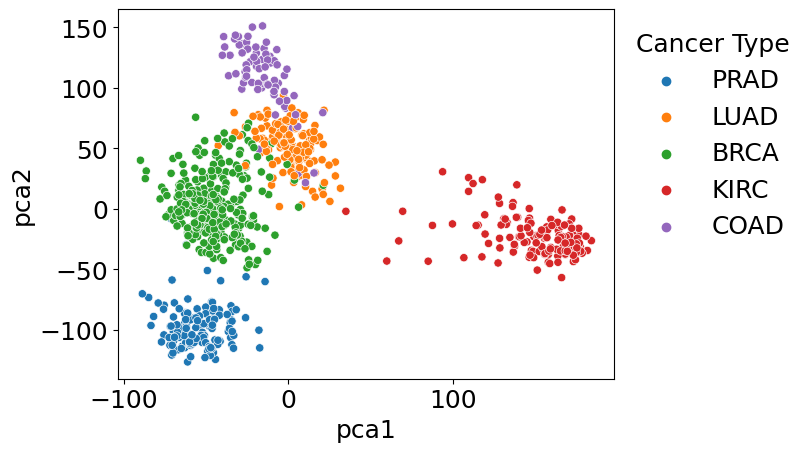

In [37]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=pca_data_2comp_unscaled)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [38]:
# Compute the explained variance ratio
explained_variance_ratio = pca_2_components.explained_variance_ratio_
explained_variance_ratio
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio)
var_sum

0.26342510244434764

In [39]:
explained_variance_ratio

array([0.1583855, 0.1050396])

In [40]:
print(pca_2_components.singular_values_)

[2142.26910596 1744.58784556]


PCA with n_components=.995

In [41]:
pca_995_varexpl=PCA(.995)
data_pca_995_varexpl = pca_995_varexpl.fit_transform(pca_data)
data_pca_995_varexpl.shape
data_pca_995_varexpl

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -6.47882986e-01, -2.07256774e-01,  1.38942922e-01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
         1.74673062e+00,  2.02232239e+00, -1.92708948e+00],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.80367340e+00,  2.22994027e+00, -8.07255452e-01]])

In [42]:
df_pca_995 = pd.DataFrame(data_pca_995_varexpl)
df_pca_995['cancer_type']=dataframe['Class']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,738,739,740,741,742,743,744,745,746,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.081064,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,0.215619,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.263786,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.381578,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,1.488047,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.780676,0.105227,-2.001001,1.579115,0.955344,0.085881,2.667448,0.632850,0.023523,BRCA
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-0.712822,0.624739,-0.162403,-0.238540,0.584705,1.404867,0.564251,-0.054682,-0.905574,LUAD
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,0.269628,-0.348648,-0.531710,0.055553,0.220559,0.331122,-0.647883,-0.207257,0.138943,COAD
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,0.045885,-2.222754,-4.115667,-0.064646,-0.447662,-0.243658,1.746731,2.022322,-1.927089,PRAD


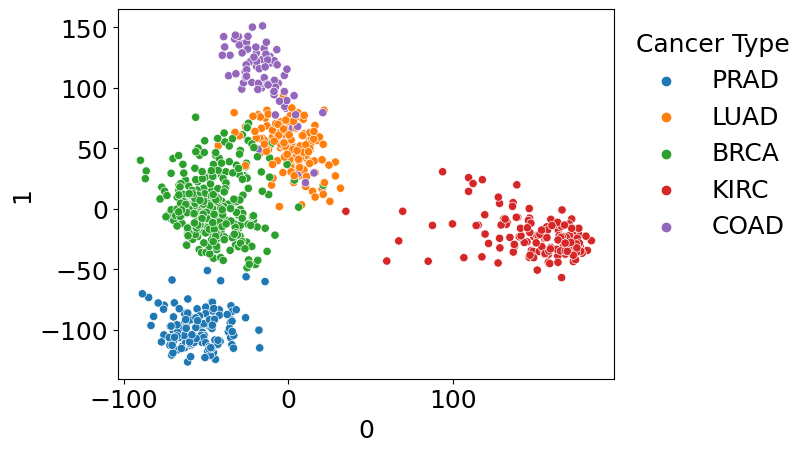

In [43]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_995)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [44]:
# Compute the explained variance ratio
explained_variance_ratio2 = pca_995_varexpl.explained_variance_ratio_
explained_variance_ratio2
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio2)
var_sum

0.99508534402634

pca with 0.8 variance explained

In [45]:
pca_80_varexpl=PCA(.8)
data_pca_80_varexpl = pca_80_varexpl.fit_transform(pca_data)
data_pca_80_varexpl.shape
data_pca_80_varexpl

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         7.94060388e+00, -7.06680386e+00, -2.81226053e+00],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.26990540e+01,  4.14578902e+00, -2.97892770e+00],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         5.60617355e+00,  6.99430777e+00,  1.09666054e+00],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
         3.94600387e-01, -8.98429207e+00,  1.53112076e+01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
        -3.33436633e+00,  6.07479033e+00, -5.17118054e-02],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.03919355e+01, -1.49445353e+01, -6.67653034e+00]])

In [46]:
df_pca_8 = pd.DataFrame(data_pca_80_varexpl)
df_pca_8['cancer_type']=dataframe['Class']
df_pca_8

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.881518,-8.955817,4.244323,0.212814,3.717421,7.387874,7.940604,-7.066804,-2.812261,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,3.390682,-3.875743,-2.757225,-0.867225,1.197545,-1.368719,12.699054,4.145789,-2.978928,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.290939,0.775069,2.062123,-11.285172,-14.747882,18.737396,5.606174,6.994308,1.096661,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.384581,-2.606969,-15.641990,-0.659666,-0.239884,5.110380,3.007725,-13.734313,4.230453,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,0.595232,-0.791296,-10.341703,5.066024,1.800128,5.257290,-6.474134,4.997844,-6.566568,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-2.086041,3.305257,-3.212236,-1.558169,-0.883681,0.349288,-0.341015,-3.538561,10.626982,BRCA
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-13.220285,0.618533,-2.815731,4.097867,8.309880,-1.452253,2.163485,2.880203,2.676312,LUAD
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,1.057910,0.120773,-6.075542,-7.890112,-3.144567,4.926071,0.394600,-8.984292,15.311208,COAD
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,13.856473,2.029606,4.053701,14.649003,-3.458088,3.418559,-3.334366,6.074790,-0.051712,PRAD


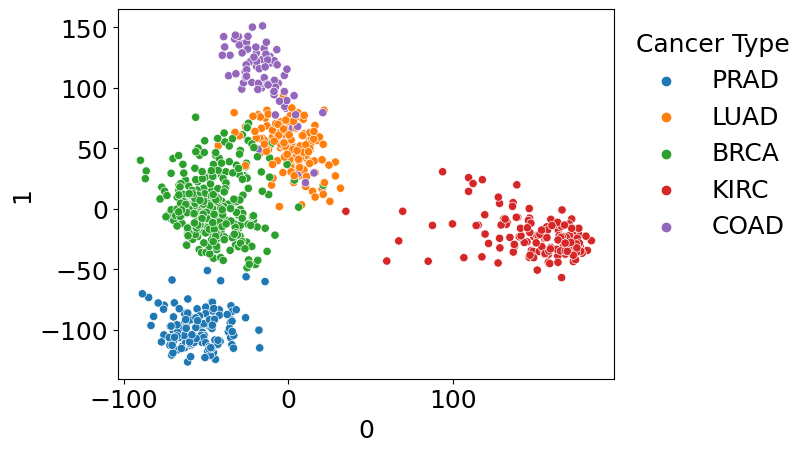

In [47]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_8)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

### PCA implementation with statsmodels 

In [14]:
import numpy as np
from statsmodels.multivariate.pca import PCA

In [11]:
# Check for zero or near-zero variance features
variances = np.var(pca_data, axis=0)
near_zero_var_indices = np.where(variances < 1e-6)[0]
if near_zero_var_indices.size > 0:
    print("Features with near-zero variance found. Removing them...")
    data = np.delete(pca_data, near_zero_var_indices, axis=1)

Features with near-zero variance found. Removing them...


In [12]:
# Scale the data
scaled_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [51]:
# check if standardization is correct (mean = 0, standarddeviation = 1)
print("mean: ", np.mean(scaled_data))
print("standarddeviation ", np.std(scaled_data))

mean:  1.5498765582443055e-18
standarddeviation  1.0000000000000002


In [52]:
# Perform PCA with two components
pca_stats = PCA(scaled_data, ncomp=2)
pca_stats

Principal Component Analysis(nobs: 801, nvar: 20264, transformation: Standardize (Correlation), normalization: True, number of components: 2, SVD, id: 0x1fc3ee6bfd0)

In [53]:
# Get the eigenvalues and eigenvectors
eigenvalues = pca_stats.eigenvals
eigenvectors = pca_stats.eigenvecs

In [54]:
# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[1710760.81560115 1420940.09173488]
Eigenvectors:
[[ 0.00097941  0.00230787]
 [-0.00235639 -0.00637287]
 [-0.00496579  0.00046648]
 ...
 [ 0.00233708 -0.01493974]
 [ 0.00195967 -0.00232062]
 [ 0.00104891  0.00100493]]


In [55]:
# Get the transformed data
transformed_data = pca_stats.factors
transformed_data

array([[-0.04392104,  0.08004063],
       [-0.01293573,  0.00061447],
       [-0.05378237, -0.01619363],
       ...,
       [-0.00315995,  0.01316241],
       [-0.02355939,  0.02812544],
       [-0.01708351,  0.00339954]])

In [56]:
transformed_data.shape

(801, 2)

plot the first two components

In [57]:
# Put the data back on the 2 columns defined 
transformed_df = pd.DataFrame(transformed_data)
# Add the convereted categorical data for 
transformed_df['cancer_type']=dataframe['Class']
transformed_df

,0,1,cancer_type
0,-0.043921,0.080041,PRAD
1,-0.012936,0.000614,LUAD
2,-0.053782,-0.016194,PRAD
3,-0.037586,-0.007741,PRAD
4,-0.013863,-0.043059,BRCA
...,...,...,...
796,-0.009494,-0.035504,BRCA
797,-0.022490,0.023931,LUAD
798,-0.003160,0.013162,COAD
799,-0.023559,0.028125,PRAD


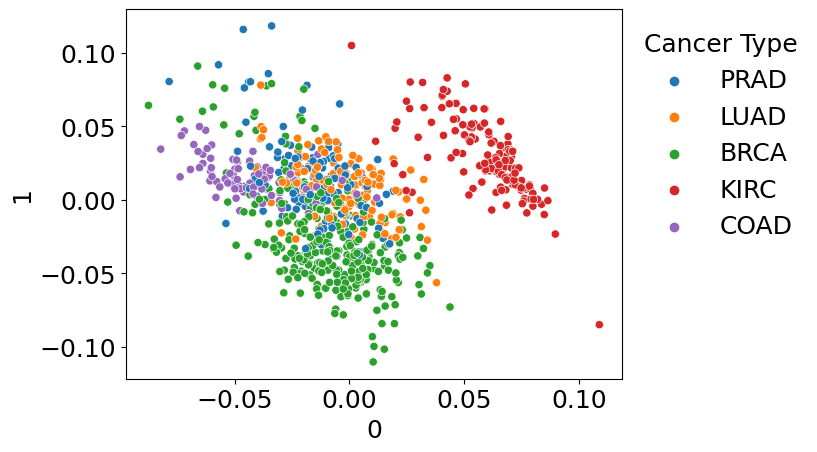

In [58]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=transformed_df)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

2 components but on centered, not scaled data

In [15]:
from data_cleaning import center_data
centered_data = center_data(data)
# Perform PCA with two components
pca_centered = PCA(centered_data, ncomp=2, standardize=False)
pca_centered

Principal Component Analysis(nobs: 801, nvar: 20264, transformation: Demean (Covariance), normalization: True, number of components: 2, SVD, id: 0x1ba55e77ad0)

In [60]:
# Get the eigenvalues and eigenvectors
eigenvalues_c = pca_centered.eigenvals
eigenvectors_c = pca_centered.eigenvecs

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues_c)

print("Eigenvectors:")
print(eigenvectors_c)

Eigenvalues:
[4589316.92233007 3043586.75088775]
Eigenvectors:
[[ 1.39681884e-04  6.97446652e-06]
 [-3.07812345e-03 -4.25819540e-04]
 [-3.77618658e-03  2.09158580e-03]
 ...
 [-1.23150936e-03  1.54605547e-03]
 [-3.50311464e-03  9.79326542e-03]
 [ 3.27959779e-04 -3.22110306e-04]]


In [61]:
# Get the transformed data
transformed_data_c = pca_centered.factors
transformed_data_c

array([[-0.0292939 ,  0.05392218],
       [-0.00113566, -0.05192392],
       [-0.03326699,  0.00462264],
       ...,
       [ 0.00489493, -0.01236429],
       [-0.0257034 ,  0.05296081],
       [-0.02292104,  0.02923191]])

plot

In [62]:
# Put the data back on the 2 columns defined 
transformed_df_c = pd.DataFrame(transformed_data_c)
# Add the convereted categorical data for 
transformed_df_c['cancer_type']=dataframe['Class']
transformed_df_c

,0,1,cancer_type
0,-0.029294,0.053922,PRAD
1,-0.001136,-0.051924,LUAD
2,-0.033267,0.004623,PRAD
3,-0.039571,0.041984,PRAD
4,-0.032470,0.005510,BRCA
...,...,...,...
796,-0.028410,0.012770,BRCA
797,-0.006752,-0.030604,LUAD
798,0.004895,-0.012364,COAD
799,-0.025703,0.052961,PRAD


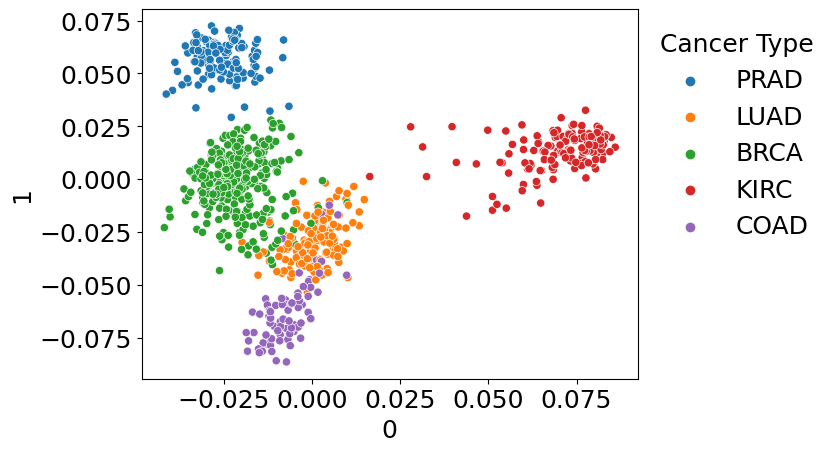

In [63]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=transformed_df_c)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

explained variance at 95% (takes around 6-7 minutes)

In [64]:
# Perform PCA
pca_stats_95 = PCA(scaled_data, standardize=False)

# Compute explained variance ratios
explained_variances = pca_stats_95.eigenvals / np.sum(pca_stats_95.eigenvals)

# Determine the number of components needed for 95% explained variance
cumulative_variance = np.cumsum(explained_variances)
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Print the number of components needed
print("Number of components for 95% explained variance:", num_components)

Number of components for 95% explained variance: 530


In [65]:
# Get the eigenvalues and eigenvectors
eigenvalues1 = pca_stats_95.eigenvals
eigenvectors1 = pca_stats_95.eigenvecs

In [66]:
# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues1)

print("Eigenvectors:")
print(eigenvectors1)

Eigenvalues:
[1.71076082e+06 1.42094009e+06 1.26769049e+06 8.38460133e+05
 6.53954592e+05 4.74101798e+05 3.82207994e+05 3.48213450e+05
 2.64897712e+05 2.00279952e+05 1.71095137e+05 1.45198816e+05
 1.38037669e+05 1.22220312e+05 1.08200664e+05 1.05007768e+05
 9.87870508e+04 9.49639045e+04 8.59238367e+04 8.36715035e+04
 7.94138404e+04 7.56116222e+04 7.38528717e+04 7.26578866e+04
 6.89623818e+04 6.78699793e+04 6.53197205e+04 6.38881786e+04
 6.33677596e+04 5.82202210e+04 5.80409353e+04 5.68065705e+04
 5.47549816e+04 5.39733213e+04 5.26987173e+04 5.19610269e+04
 5.01910980e+04 4.79143417e+04 4.62639571e+04 4.55127083e+04
 4.49834446e+04 4.36536935e+04 4.31825170e+04 4.23708444e+04
 4.20171513e+04 4.14824262e+04 4.09422953e+04 4.04439066e+04
 3.95746439e+04 3.86081908e+04 3.79457465e+04 3.72811398e+04
 3.68095884e+04 3.65060496e+04 3.52980445e+04 3.48906954e+04
 3.45849711e+04 3.42095462e+04 3.32428268e+04 3.31513031e+04
 3.24397695e+04 3.20783353e+04 3.20283932e+04 3.16294981e+04
 3.12444282

In [108]:
# Compute the explained by the two components

# Extract eigenvalues from the PCA results
eigenvalues = pca_stats_95.eigenvals

# Compute the variance explained by each principal component
variance_explained_statsmodels = eigenvalues / eigenvalues.sum()

# Compare the variance explained
for i in range(len(variance_explained_statsmodels)):
    print(f"Variance explained by component {i+1} (statsmodels): {variance_explained_statsmodels[i]:.4f}")

Variance explained by component 1 (statsmodels): 0.1054
Variance explained by component 2 (statsmodels): 0.0875
Variance explained by component 3 (statsmodels): 0.0781
Variance explained by component 4 (statsmodels): 0.0517
Variance explained by component 5 (statsmodels): 0.0403
Variance explained by component 6 (statsmodels): 0.0292
Variance explained by component 7 (statsmodels): 0.0235
Variance explained by component 8 (statsmodels): 0.0215
Variance explained by component 9 (statsmodels): 0.0163
Variance explained by component 10 (statsmodels): 0.0123
Variance explained by component 11 (statsmodels): 0.0105
Variance explained by component 12 (statsmodels): 0.0089
Variance explained by component 13 (statsmodels): 0.0085
Variance explained by component 14 (statsmodels): 0.0075
Variance explained by component 15 (statsmodels): 0.0067
Variance explained by component 16 (statsmodels): 0.0065
Variance explained by component 17 (statsmodels): 0.0061
Variance explained by component 18 (stat

In [67]:
# Get the transformed data
transformed_data_95 = pca_stats_95.factors
transformed_data_95

array([[-0.04392104,  0.08004063,  0.06599199, ..., -0.00470745,
         0.00548763,  0.05843053],
       [-0.01293573,  0.00061447, -0.05690727, ...,  0.00716991,
         0.00584419, -0.01523592],
       [-0.05378237, -0.01619363,  0.01819693, ..., -0.00088255,
         0.00180809, -0.03801126],
       ...,
       [-0.00315995,  0.01316241, -0.020112  , ..., -0.00919265,
         0.00190595, -0.00565457],
       [-0.02355939,  0.02812544,  0.06267389, ...,  0.00328811,
        -0.0038408 ,  0.02520995],
       [-0.01708351,  0.00339954,  0.02871247, ..., -0.0300086 ,
        -0.01567851, -0.06581289]])

In [68]:
# Put the data back on the 2 columns defined 
transformed_95_df = pd.DataFrame(transformed_data_95)
# Add the convereted categorical data for 
transformed_95_df['cancer_type']=dataframe['Class']
transformed_95_df

,0,1,2,3,4,5,6,7,8,9,...,792,793,794,795,796,797,798,799,800,cancer_type
0,-0.043921,0.080041,0.065992,0.013287,-0.009870,-0.052513,0.012404,-0.033810,0.000276,-0.006782,...,0.001364,0.011069,-0.011502,0.005844,-0.004475,0.012364,-0.004707,0.005488,0.058431,PRAD
1,-0.012936,0.000614,-0.056907,0.002288,0.031442,-0.040352,0.026095,0.028862,-0.042791,0.062395,...,-0.003637,0.010612,-0.017403,-0.009041,0.002084,-0.004110,0.007170,0.005844,-0.015236,LUAD
2,-0.053782,-0.016194,0.018197,-0.052533,-0.030220,-0.025361,-0.033494,0.080710,-0.055661,0.028567,...,0.013196,-0.003971,0.006336,-0.008131,-0.005914,0.005181,-0.000883,0.001808,-0.038011,PRAD
3,-0.037586,-0.007741,0.054395,-0.041287,-0.001285,-0.033752,0.007766,0.036528,-0.029873,0.028784,...,0.028483,-0.011885,0.008740,0.012788,0.000912,0.004345,0.009481,0.004918,-0.014451,PRAD
4,-0.013863,-0.043059,0.014742,0.019329,-0.032633,0.002253,0.010136,-0.020906,-0.008226,-0.064364,...,-0.002014,-0.000721,-0.027969,0.018934,-0.003647,0.006007,0.001623,-0.007579,0.024503,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.009494,-0.035504,0.024966,0.034074,-0.047998,-0.004012,0.025111,-0.017995,0.016570,-0.061614,...,-0.008361,0.011005,-0.002582,-0.022827,-0.028994,0.002020,-0.016024,-0.011771,0.026545,BRCA
797,-0.022490,0.023931,-0.014172,0.012707,0.045842,0.023585,0.028050,0.059494,-0.052207,-0.069599,...,0.002528,-0.004298,-0.001364,-0.001453,0.002515,0.011962,0.002763,0.012190,-0.005340,LUAD
798,-0.003160,0.013162,-0.020112,0.013086,0.071519,0.057589,-0.077185,-0.041046,0.044123,0.073490,...,-0.000556,0.000949,0.001385,-0.003522,-0.000053,-0.002095,-0.009193,0.001906,-0.005655,COAD
799,-0.023559,0.028125,0.062674,-0.018176,0.020503,0.006272,-0.033131,0.016188,0.007150,0.017762,...,0.011079,0.003232,-0.008313,0.010798,0.005425,-0.005576,0.003288,-0.003841,0.025210,PRAD


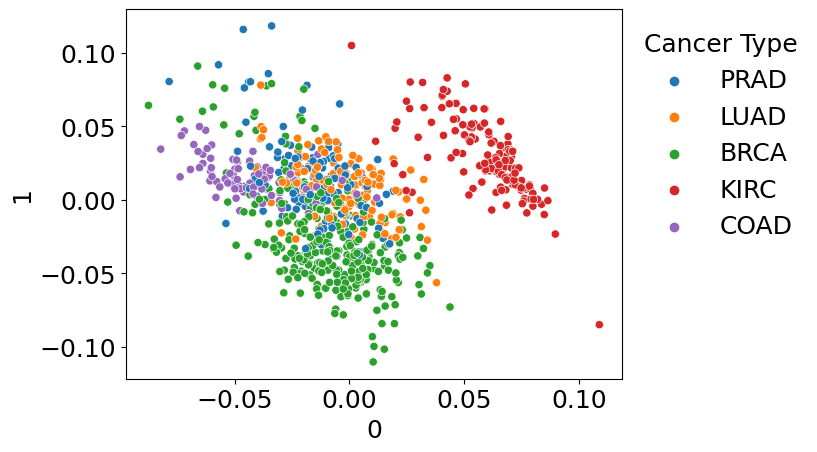

In [69]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=transformed_df)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

on centered data

In [16]:
import numpy as np
from statsmodels.multivariate.pca import PCA

In [17]:
from data_cleaning import center_data
centered_data2 = center_data(pca_data)

In [18]:
# Perform PCA
pca_stats_centered = PCA(centered_data2, standardize=False)
pca_stats_centered

Principal Component Analysis(nobs: 801, nvar: 20531, transformation: Demean (Covariance), normalization: True, number of components: 801, SVD, id: 0x1ba57661210)

In [19]:
# Compute explained variance ratios
explained_variances = pca_stats_centered.eigenvals / np.sum(pca_stats_centered.eigenvals)

# Determine the number of components needed for 95% explained variance
cumulative_variance = np.cumsum(explained_variances)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

# Print the number of components needed
print("Number of components for 95% explained variance:", num_components_95)
print("Number of components for 80% explained variance:", num_components_80)

Number of components for 95% explained variance: 478
Number of components for 80% explained variance: 129


In [20]:
explained_variances

array([1.58385502e-01, 1.05039600e-01, 9.47222083e-02, 6.50080336e-02,
       3.61561783e-02, 2.97266705e-02, 2.65714239e-02, 1.56273075e-02,
       1.40707327e-02, 1.22687325e-02, 9.60110033e-03, 8.90219244e-03,
       7.58205527e-03, 7.23021295e-03, 6.64002139e-03, 6.37713380e-03,
       5.69484775e-03, 5.17577102e-03, 4.62121409e-03, 4.45511704e-03,
       4.43458295e-03, 4.06433767e-03, 3.95469831e-03, 3.73193404e-03,
       3.68555898e-03, 3.55682493e-03, 3.48486339e-03, 3.16722678e-03,
       3.10381215e-03, 2.95236028e-03, 2.89217028e-03, 2.76294055e-03,
       2.73106816e-03, 2.62048411e-03, 2.51405018e-03, 2.51115763e-03,
       2.40637037e-03, 2.35678917e-03, 2.32169987e-03, 2.25441828e-03,
       2.22014731e-03, 2.17486887e-03, 2.12139803e-03, 2.10345082e-03,
       2.08597543e-03, 2.04290041e-03, 1.96472299e-03, 1.95728543e-03,
       1.93418289e-03, 1.89133509e-03, 1.81771843e-03, 1.78520804e-03,
       1.75768926e-03, 1.72698808e-03, 1.70410487e-03, 1.67957902e-03,
      

In [21]:
# Compute the explained by the two components

# Extract eigenvalues from the PCA results
eigenvalues = pca_stats_centered.eigenvals

# Compute the variance explained by each principal component
variance_explained_statsmodels = eigenvalues / eigenvalues.sum()

# Compare the variance explained

for i in range(len(variance_explained_statsmodels)):
    print(f"Variance explained by component {i+1} (statsmodels): {variance_explained_statsmodels[i]:.4f}")

var_explained_80 = 0
for i in range(239):
     var_explained_80 += variance_explained_statsmodels[i]

print(f"Variance explained by component 239 (statsmodels): {var_explained_80}")

Variance explained by component 1 (statsmodels): 0.1584
Variance explained by component 2 (statsmodels): 0.1050
Variance explained by component 3 (statsmodels): 0.0947
Variance explained by component 4 (statsmodels): 0.0650
Variance explained by component 5 (statsmodels): 0.0362
Variance explained by component 6 (statsmodels): 0.0297
Variance explained by component 7 (statsmodels): 0.0266
Variance explained by component 8 (statsmodels): 0.0156
Variance explained by component 9 (statsmodels): 0.0141
Variance explained by component 10 (statsmodels): 0.0123
Variance explained by component 11 (statsmodels): 0.0096
Variance explained by component 12 (statsmodels): 0.0089
Variance explained by component 13 (statsmodels): 0.0076
Variance explained by component 14 (statsmodels): 0.0072
Variance explained by component 15 (statsmodels): 0.0066
Variance explained by component 16 (statsmodels): 0.0064
Variance explained by component 17 (statsmodels): 0.0057
Variance explained by component 18 (stat

### Compare Own PCA and libaries

In [70]:
# own PCA for two components
from dataimport import random_sample
from our_pca import our_pca

centered_dataframe = pd.DataFrame(centered_data)

n_components = 2
data = random_sample(centered_dataframe, 801, 2000)
own_pca = our_pca(data, n_components)

In [71]:
own_eigenvalues, own_eigenvectors = own_pca

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(own_eigenvalues)

print("Eigenvectors:")
print(own_eigenvectors)

Eigenvalues:
[537.70807379 378.13337258]
Eigenvectors:
[[-0.02049053  0.00423743]
 [ 0.00215849 -0.01790502]
 [ 0.000189    0.0123908 ]
 ...
 [-0.01485701 -0.00284151]
 [ 0.01183547  0.01140588]
 [ 0.00012316  0.00034059]]


In [72]:
own_eig_df = pd.DataFrame(own_eigenvectors)
# Rename the columns
own_eig_df.columns = ["eigenvec_0", "eigenvec_1"]
own_eig_df

,eigenvec_0,eigenvec_1
0,-0.020491,0.004237
1,0.002158,-0.017905
2,0.000189,0.012391
3,0.001326,0.019372
4,-0.000724,0.002088
...,...,...
1995,0.020860,-0.036562
1996,0.012806,-0.033833
1997,-0.014857,-0.002842
1998,0.011835,0.011406


#### own PCA and statsmodels
comparison statsmodels on smaller dataset

In [73]:
from statsmodels.multivariate.pca import PCA

In [74]:
# Perform PCA with two components
pca_stats_sample = PCA(data, ncomp=2, standardize=False)
pca_stats_sample

Principal Component Analysis(nobs: 801, nvar: 2000, transformation: Demean (Covariance), normalization: True, number of components: 2, SVD, id: 0x1fc42e93850)

In [75]:
# Get the eigenvalues and eigenvectors
eigenvalues_sample = pca_stats_sample.eigenvals
eigenvectors_sample = pca_stats_sample.eigenvecs

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues_sample)

print("Eigenvectors:")
print(eigenvectors_sample)

Eigenvalues:
0    430166.459030
1    302506.698063
Name: eigenvals, dtype: float64
Eigenvectors:
      eigenvec_0  eigenvec_1
0       0.020491   -0.004237
1      -0.002158    0.017905
2      -0.000189   -0.012391
3      -0.001326   -0.019372
4       0.000724   -0.002088
...          ...         ...
1995   -0.020860    0.036562
1996   -0.012806    0.033833
1997    0.014857    0.002842
1998   -0.011835   -0.011406
1999   -0.000123   -0.000341

[2000 rows x 2 columns]


check if the outputs from our PCA and statsmodels are the same

In [76]:
# Check if the eigenvectors contain the same values
check_df = abs(eigenvectors_sample - own_eig_df)
check_df

,eigenvec_0,eigenvec_1
0,0.040981,0.008475
1,0.004317,0.035810
2,0.000378,0.024782
3,0.002653,0.038743
4,0.001447,0.004177
...,...,...
1995,0.041721,0.073124
1996,0.025612,0.067665
1997,0.029714,0.005683
1998,0.023671,0.022812


In [77]:
# Check if values in the DataFrame are nearly zero
is_close_to_zero = np.isclose(check_df, 0.0, atol=1e-10)
is_close_to_zero

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [78]:
# Check if all values in the array are True
np.all(is_close_to_zero)

False

#### own PCA and sklearn
comparison sklearn on smaller dataset

In [79]:
from sklearn.decomposition import PCA

In [80]:
# define number of components as 2 
pca_sk_sample=PCA(n_components=2)
pca_sk_sample.fit(data)

PCA(n_components=2)

In [81]:
eigenvectors_sk_sample = pca_sk_sample.components_
eigenvectors_sk_sample

array([[-0.02049053,  0.00215849,  0.000189  , ..., -0.01485701,
         0.01183547,  0.00012316],
       [ 0.00423743, -0.01790502,  0.0123908 , ..., -0.00284151,
         0.01140588,  0.00034059]])

In [82]:
#put own eigenvectors into a DataFrame while only using the real numbers from the given complex numbers
eigenvectors_sk_df = pd.DataFrame(eigenvectors_sk_sample.transpose())
# Rename columns
eigenvectors_sk_df.columns = ['eigenvec_0', 'eigenvec_1']
eigenvectors_sk_df


,eigenvec_0,eigenvec_1
0,-0.020491,0.004237
1,0.002158,-0.017905
2,0.000189,0.012391
3,0.001326,0.019372
4,-0.000724,0.002088
...,...,...
1995,0.020860,-0.036562
1996,0.012806,-0.033833
1997,-0.014857,-0.002842
1998,0.011835,0.011406


check if the outputs from our PCA and sklearn are the same

In [83]:
# Check if the eigenvectors contain the same values
check_df2 = abs(eigenvectors_sk_df - own_eig_df)
check_df2

,eigenvec_0,eigenvec_1
0,4.007045e-12,3.373676e-11
1,1.675709e-12,3.234565e-14
2,2.956860e-12,5.932731e-11
3,3.017192e-12,3.152828e-11
4,8.672798e-13,6.815282e-12
...,...,...
1995,3.755607e-13,4.751755e-12
1996,1.674742e-12,2.240674e-11
1997,1.033080e-12,5.146363e-12
1998,1.707183e-12,5.254304e-11


In [84]:
# Check if values in the DataFrame are nearly zero
is_close_to_zero2 = np.isclose(check_df2, 0.0, atol=1e-10)
is_close_to_zero2

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [85]:
# Check if all values in the array are True
np.all(is_close_to_zero2)

False

## Classification using Decision Tree

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.datasets import load_iris

In [87]:
# load data
# rausnehmen: dc = pca_data_2comp_unscaled

# initiate pca and classifier
pca = PCA()
classifier1 = DecisionTreeClassifier()
classifier2 = DecisionTreeClassifier()
classifier3 = DecisionTreeClassifier()

Train decision tree with original data

In [88]:
# Split the transformed data set
y = dataframe['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Fit the data
classifier1.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
# predict labels with trained classifier
pred_labels = classifier1.predict(X_test)
pred_labels

array(['LUAD', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'COAD',
       'PRAD', 'LUAD', 'COAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'LUAD',
       'LUAD', 'PRAD', 'BRCA', 'LUAD', 'LUAD', 'COAD', 'KIRC', 'LUAD',
       'BRCA', 'BRCA', 'PRAD', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'PRAD',
       'PRAD', 'COAD', 'BRCA', 'BRCA', 'LUAD', 'BRCA', 'BRCA', 'BRCA',
       'COAD', 'BRCA', 'BRCA', 'BRCA', 'KIRC', 'PRAD', 'KIRC', 'COAD',
       'BRCA', 'BRCA', 'PRAD', 'LUAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'LUAD', 'LUAD', 'LUAD', 'KIRC', 'PRAD', 'BRCA',
       'PRAD', 'BRCA', 'LUAD', 'BRCA', 'KIRC', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'BRCA', 'BRCA', 'LUAD', 'PRAD', 'PRAD', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'COAD', 'COAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'LUAD', 'COAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'KIRC', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'PRAD', 'KIRC',
      

In [91]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels, average='macro')
recall = recall_score(y_test, pred_labels, average='macro')
f1 = 2*precision*recall / (precision+recall)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9503105590062112
Precision: 0.9570159922682763
Recall: 0.94594486748911
F1: 0.9514482248537585


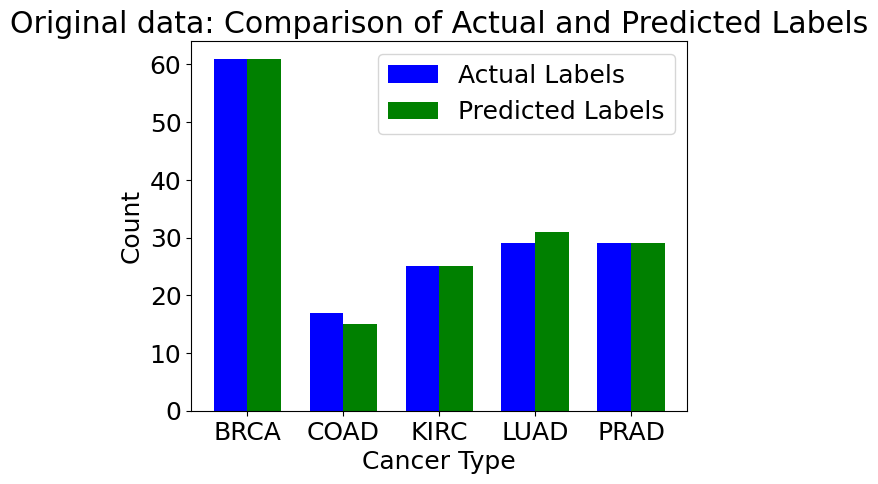

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(pred_labels, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Original data: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()

Train decisiontree with data from LIBRARY PCA (sklearn)

In [93]:
# apply pca
transformed_data = pca.fit_transform(X_train)

In [94]:
# Fit the data
classifier2.fit(transformed_data, y_train)

DecisionTreeClassifier()

In [95]:
# predict new data
newdata = X_test
# transform newdata using fitted pca
newdata_transformed = pca.transform(newdata)
# predict labels with trained classifier
pred_labels = classifier2.predict(newdata_transformed)

pred_labels

array(['LUAD', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'COAD',
       'PRAD', 'LUAD', 'COAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'LUAD',
       'LUAD', 'PRAD', 'BRCA', 'LUAD', 'LUAD', 'COAD', 'KIRC', 'BRCA',
       'BRCA', 'BRCA', 'COAD', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'PRAD',
       'PRAD', 'COAD', 'BRCA', 'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
       'COAD', 'BRCA', 'BRCA', 'BRCA', 'KIRC', 'PRAD', 'KIRC', 'COAD',
       'BRCA', 'BRCA', 'PRAD', 'LUAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'LUAD', 'LUAD', 'LUAD', 'KIRC', 'PRAD', 'BRCA',
       'PRAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'BRCA', 'BRCA', 'LUAD', 'PRAD', 'PRAD', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'COAD', 'COAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'LUAD', 'COAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'KIRC', 'BRCA', 'KIRC', 'BRCA', 'BRCA', 'PRAD', 'KIRC',
      

In [96]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels, average='macro')
recall = recall_score(y_test, pred_labels, average='macro')
f1 = 2*precision*recall / (precision+recall)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9937888198757764
Precision: 0.9888888888888889
Recall: 0.993103448275862
F1: 0.9909916876087377


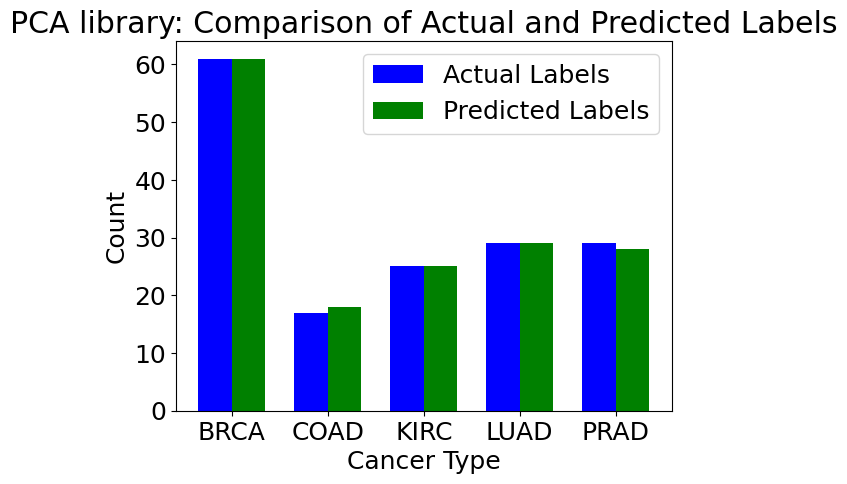

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(pred_labels, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('PCA library: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()

Train decisiontree with data from OWN PCA

In [98]:
from dataimport import random_sample
from our_pca import our_pca, apply_components
from data_cleaning import center_data

In [99]:
# Getting sample from data and defining X and y
data_sample = random_sample(dataframe, 801, 2000, labeled=True)

y = data_sample['Class']
X = center_data(data_sample.drop(['Class'], axis=1))

# Split the transformed data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[9212, 14459, 8002, 17400, 11196, 8204, 6509, 16439, 6778, 9675, 14230, 339, 12781, 16974, 14021, 19671, 4664, 10250, 2036, 7267, 19054, 1405, 7861, 15591, 13833, 5953, 221, 2460, 4141, 9111, 12581, 19498, 8990, 9572, 8667, 6628, 7867, 1187, 10757, 18106, 16571, 16689, 14058, 18581, 9786, 4872, 4081, 14281, 4285, 15892, 6754, 1431, 3710, 5250, 16055, 19847, 9463, 9268, 12007, 1067, 16606, 3869, 14000, 6894, 15666, 7761, 7762, 1383, 18006, 9942, 19982, 10801, 7980, 472, 19033, 6231, 1902, 13057, 20428, 7893, 470, 11718, 12319, 5677, 16413, 14579, 7051, 8879, 15547, 9734, 17016, 3596, 8960, 16093, 10725, 198, 7687, 1082, 18862, 5926, 11970, 9002, 9034, 11678, 1434, 10161, 19991, 19836, 16801, 1146, 5601, 10286, 15884, 13539, 16881, 5887, 12861, 12848, 16523, 19018, 6283, 4755, 19674, 16403, 14303, 7455, 16610, 13315, 5380, 14242, 7971, 9248, 6533, 5886, 7307, 3396, 15852, 19257, 10102, 5151, 12296, 6927, 12812, 18785, 19203, 17581, 15102, 18262, 18117, 16184, 17976, 18179, 14921, 4892, 6

In [100]:
# Applying our own PCA
eigenvalues, eigenvectors = our_pca(X_train, 2)

#put own eigenvectors into a DataFrame while only using the real numbers from the given complex numbers
real_eigenvectors = pd.DataFrame(eigenvectors)
own_eig = pd.DataFrame()
own_eig['eigenvec_0'] = real_eigenvectors[0].to_numpy().real
own_eig['eigenvec_1'] = real_eigenvectors[1].to_numpy().real

transformed_data = apply_components(X_train, own_eig)

In [101]:
# Fit the data
classifier3.fit(transformed_data, y_train)

DecisionTreeClassifier()

In [102]:
# predict new data
newdata = X_test
# transform newdata using fitted pca
newdata_transformed = apply_components(newdata, own_eig)
# predict labels with trained classifier
pred_labels = classifier3.predict(newdata_transformed)

pred_labels

array(['KIRC', 'LUAD', 'PRAD', 'PRAD', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
       'BRCA', 'KIRC', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'LUAD', 'COAD', 'KIRC', 'BRCA', 'BRCA', 'LUAD', 'PRAD',
       'KIRC', 'BRCA', 'COAD', 'PRAD', 'LUAD', 'KIRC', 'BRCA', 'LUAD',
       'PRAD', 'LUAD', 'BRCA', 'BRCA', 'BRCA', 'KIRC', 'BRCA', 'KIRC',
       'BRCA', 'LUAD', 'KIRC', 'KIRC', 'LUAD', 'LUAD', 'PRAD', 'BRCA',
       'BRCA', 'PRAD', 'BRCA', 'BRCA', 'COAD', 'KIRC', 'KIRC', 'PRAD',
       'BRCA', 'BRCA', 'LUAD', 'LUAD', 'KIRC', 'BRCA', 'BRCA', 'KIRC',
       'BRCA', 'LUAD', 'KIRC', 'KIRC', 'BRCA', 'COAD', 'PRAD', 'PRAD',
       'PRAD', 'PRAD', 'COAD', 'KIRC', 'PRAD', 'PRAD', 'BRCA', 'PRAD',
       'BRCA', 'BRCA', 'LUAD', 'KIRC', 'KIRC', 'PRAD', 'LUAD', 'BRCA',
       'BRCA', 'BRCA', 'LUAD', 'KIRC', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
       'LUAD', 'BRCA', 'BRCA', 'LUAD', 'BRCA', 'BRCA', 'LUAD', 'COAD',
       'PRAD', 'COAD', 'KIRC', 'BRCA', 'COAD', 'LUAD', 'KIRC', 'BRCA',
      

In [103]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels, average='macro')
recall = recall_score(y_test, pred_labels, average='macro')
f1 = 2*precision*recall / (precision+recall)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.8260869565217391
Precision: 0.8243056753493188
Recall: 0.8126693676598802
F1: 0.8184461636179227


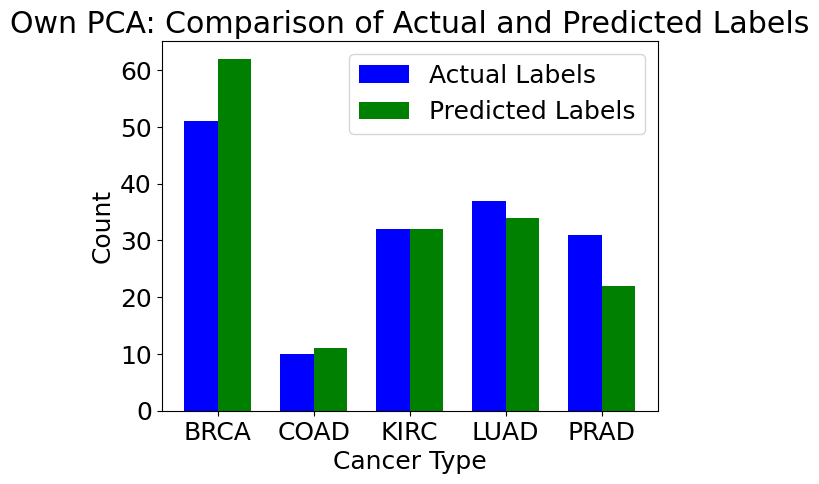

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(pred_labels, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Own PCA: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()

Train decisiontree with data from LIBRARY T-SNE

In [105]:
from sklearn.manifold import TSNE

In [106]:
# Initiate classifier
classifier4 = DecisionTreeClassifier()

X = df1
y = dataframe['Class']

# Reduce data dimensionality using t-SNE
tsne = TSNE(learning_rate=200, perplexity=100)
X_tsne = tsne.fit_transform(X)

# Split the transformed data set
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Train the classifier
classifier4.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier4.predict(X_test)

# Evaluating the accuracy, precision, recall, f1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = 2*precision*recall / (precision+recall)
print("Prediction success for only 2000 features, transformed with own components:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Prediction success for only 2000 features, transformed with own components:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


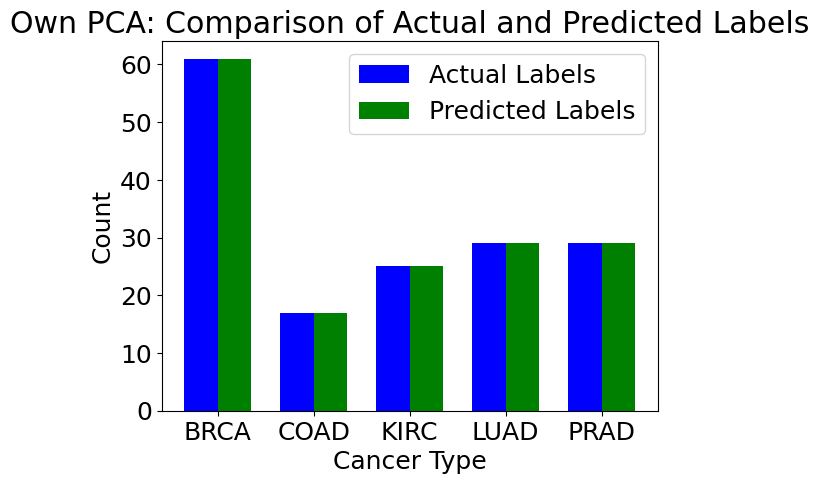

In [107]:
# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(y_pred, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Own PCA: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()